In [488]:
import pandas as pd

# L칛s in CSV-filen (byt s칬kv칛g vid behov)
df = pd.read_csv("imdb_top_1000.csv")

# Beh친ll bara relevanta kolumner
df = df[['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating']]

df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df['Released_Year'] = df['Released_Year'].str.extract('(\d{4})').astype(float)
df['Main_Genre'] = df['Genre'].str.split(',').str[0].str.strip()
df.dropna(inplace=True)
df.describe()


<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\albin\AppData\Local\Temp\ipykernel_96396\66903748.py:11: SyntaxWarning: invalid escape sequence '\d'
  df['Released_Year'] = df['Released_Year'].str.extract('(\d{4})').astype(float)


Released_Year     Runtime  IMDB_Rating
count     999.000000  999.000000   999.000000
mean     1991.217217  122.873874     7.949650
std        23.297025   28.102520     0.275407
min      1920.000000   45.000000     7.600000
25%      1976.000000  103.000000     7.700000
50%      1999.000000  119.000000     7.900000
75%      2009.000000  137.000000     8.100000
max      2020.000000  321.000000     9.300000

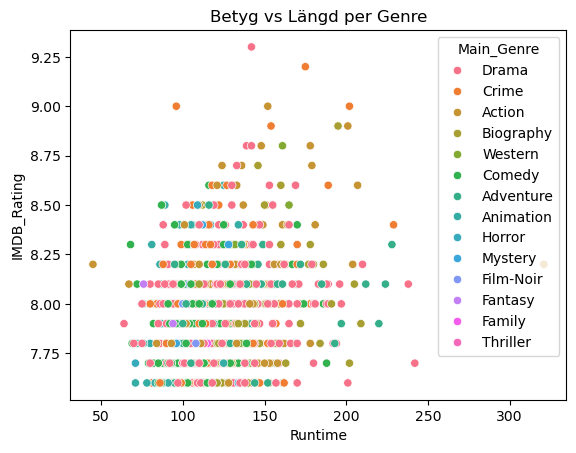

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Runtime', y='IMDB_Rating', hue='Main_Genre')
plt.title("Betyg vs L칛ngd per Genre")
plt.show()


In [490]:
from sklearn.preprocessing import StandardScaler

# Numeriska features
features = df[['Released_Year', 'Runtime', 'IMDB_Rating']]

# One hot encoding av Main_Genre
genre_dummies = pd.get_dummies(df['Main_Genre'])

# Kombinera
X = pd.concat([features, genre_dummies], axis=1)

# Standardisera
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


游늺 Silhouette Score (PCA + KMeans, k=4): 0.230


C:\Users\albin\AppData\Local\Temp\ipykernel_96396\3669686354.py:24: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\albin\anaconda3\envs\condavenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


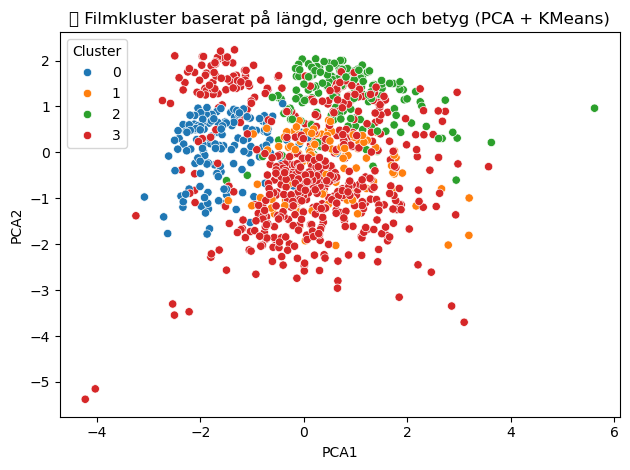

In [491]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. KMeans p친 skalad data
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 2. PCA f칬r att visualisera i 2D
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

# 3. Silhouette Score
score = silhouette_score(X_scaled, df['Cluster'])
print(f"游늺 Silhouette Score (PCA + KMeans, k=4): {score:.3f}")

# 4. Plot
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title("游꿟 Filmkluster baserat p친 l칛ngd, genre och betyg (PCA + KMeans)")
plt.tight_layout()
plt.show()


c:\Users\albin\anaconda3\envs\condavenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\albin\anaconda3\envs\condavenv\Lib\site-packages\umap\umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
c:\Users\albin\anaconda3\envs\condavenv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


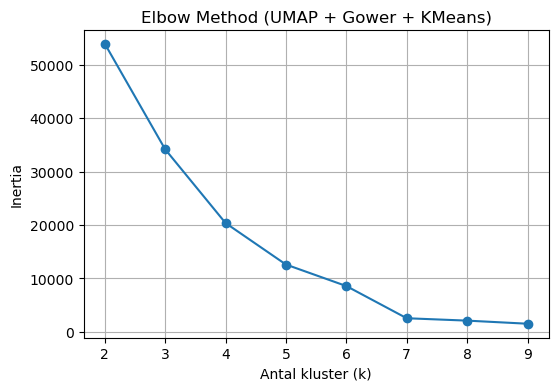

In [492]:
import gower
import matplotlib.pyplot as plt
from umap.umap_ import UMAP
from sklearn.cluster import KMeans

# === Gower + UMAP ===
X_gower = gower.gower_matrix(df[['Runtime', 'Released_Year', 'IMDB_Rating', 'Main_Genre']])
umap_model = UMAP(metric='precomputed', random_state=42)
embedding = umap_model.fit_transform(X_gower)
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]

# === Elbow (Inertia) ===
inertias = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embedding)
    inertias.append(kmeans.inertia_)

# === Plot Elbow ===
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method (UMAP + Gower + KMeans)")
plt.xlabel("Antal kluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


游늺 Silhouette Score (UMAP + KMeans, k=4): 0.618


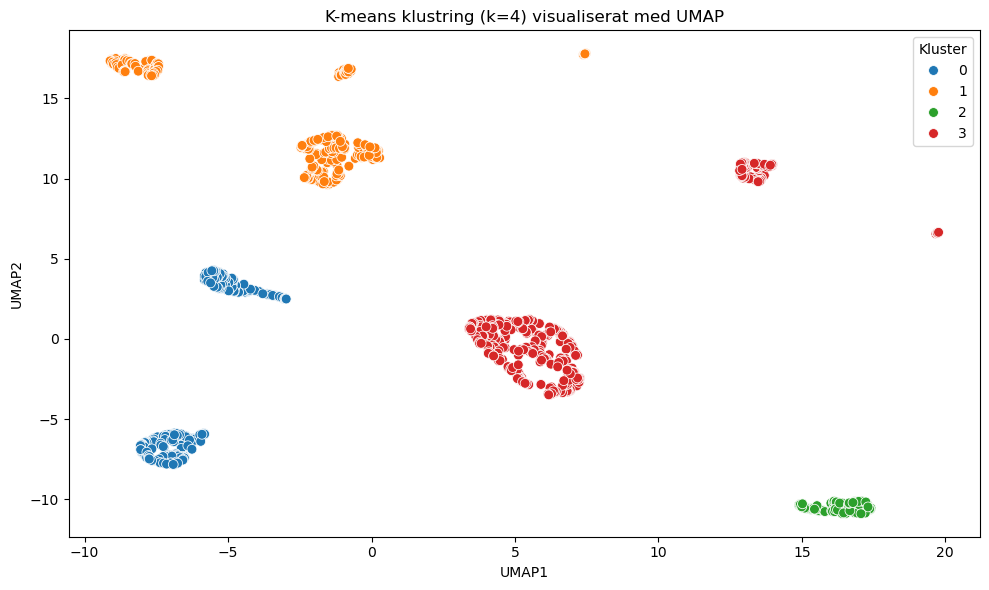

In [493]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# L칛gg till UMAP-komponenter i df om du inte redan gjort det
df[["UMAP1", "UMAP2"]] = X_umap

# KMeans med valt antal kluster (t.ex. k=4)
k = 4  # <-- byt till det v칛rde du vill testa
kmeans_umap = KMeans(n_clusters=k, random_state=42)
df["Cluster"] = kmeans_umap.fit_predict(X_umap)

# Silhouette Score
score = silhouette_score(X_umap, df["Cluster"])
print(f"游늺 Silhouette Score (UMAP + KMeans, k={k}): {score:.3f}")

# Rita UMAP-plot med klusterf칛rg
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="UMAP1", y="UMAP2", hue="Cluster", palette="tab10", s=50)
plt.title(f"K-means klustring (k={k}) visualiserat med UMAP")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title="Kluster")
plt.tight_layout()
plt.show()


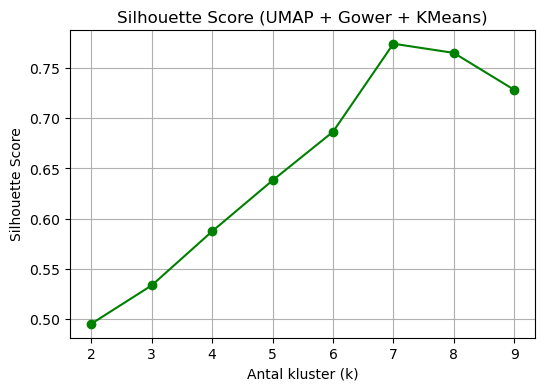

In [494]:
from sklearn.metrics import silhouette_score

# === Silhouette Score ===
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embedding)
    silhouette_scores.append(silhouette_score(embedding, labels))

# === Plot Silhouette ===
plt.figure(figsize=(6, 4))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score (UMAP + Gower + KMeans)")
plt.xlabel("Antal kluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


游늺 Silhouette Score f칬r k=7: 0.775


C:\Users\albin\AppData\Local\Temp\ipykernel_96396\558502871.py:36: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\albin\anaconda3\envs\condavenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


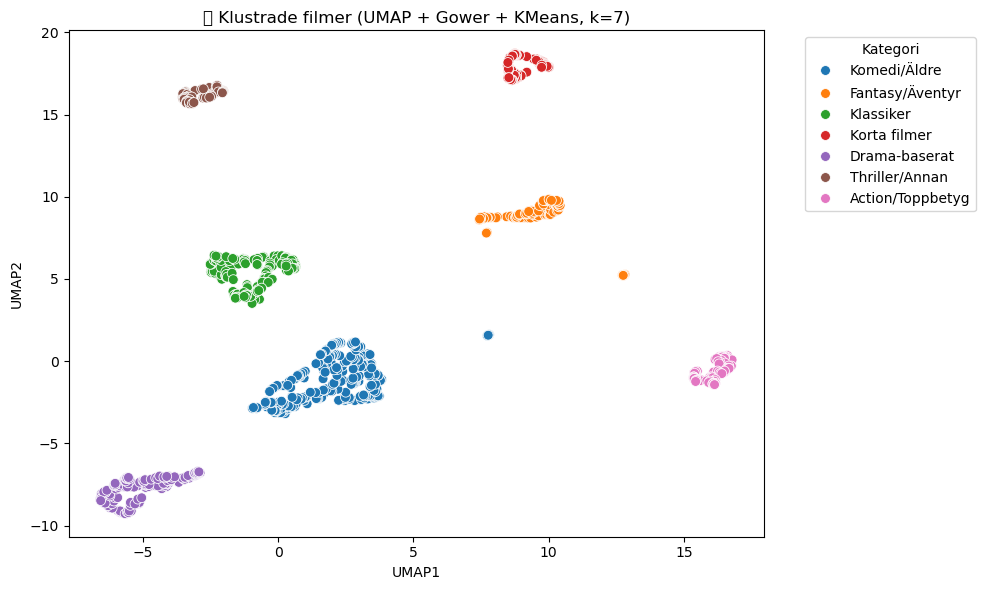

In [495]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# === Kontroll: Se till att UMAP1 och UMAP2 finns i df ===
df["UMAP1"] = embedding[:, 0]
df["UMAP2"] = embedding[:, 1]

# === V칛lj antal kluster och k칬r KMeans ===
k_best = 7
kmeans = KMeans(n_clusters=k_best, random_state=42)
df["Cluster"] = kmeans.fit_predict(embedding)

# === L칛gg till kategorinamn (f칬rklarande etiketter)
kategori_namn = {
    0: "Drama-baserat",
    1: "Klassiker",
    2: "Action/Toppbetyg",
    3: "Komedi/츿ldre",
    4: "Fantasy/츿ventyr",
    5: "Korta filmer",
    6: "Thriller/Annan"
}
df["Kategori"] = df["Cluster"].map(kategori_namn)

# === Ber칛kna Silhouette Score
score = silhouette_score(embedding, df["Cluster"])
print(f"游늺 Silhouette Score f칬r k={k_best}: {score:.3f}")

# === Visualisera kluster med kategorinamn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="UMAP1", y="UMAP2", hue="Kategori", palette="tab10", s=50)
plt.title(f"游꿟 Klustrade filmer (UMAP + Gower + KMeans, k={k_best})")
plt.legend(title="Kategori", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [496]:
df.head()

Series_Title  Released_Year  Runtime                 Genre  \
0  The Shawshank Redemption         1994.0      142                 Drama   
1             The Godfather         1972.0      175          Crime, Drama   
2           The Dark Knight         2008.0      152  Action, Crime, Drama   
3    The Godfather: Part II         1974.0      202          Crime, Drama   
4              12 Angry Men         1957.0       96          Crime, Drama   

   IMDB_Rating Main_Genre  Cluster      PCA1      PCA2     UMAP1     UMAP2  \
0          9.3      Drama        3  2.208170 -2.449093  2.906098 -2.340147   
1          9.2      Crime        4  2.792978 -2.018620  8.446316  8.784045   
2          9.0     Action        1  2.675097  0.304922 -2.446080  5.490186   
3          9.0      Crime        4  3.191946 -1.806757  8.593484  8.826683   
4          9.0      Crime        4  0.617569 -2.027249  7.871607  8.749153   

          Kategori  
0     Komedi/츿ldre  
1  Fantasy/츿ventyr  
2        Klassiker  
3  Fantasy/츿ventyr  
4  Fantasy/츿ventyr

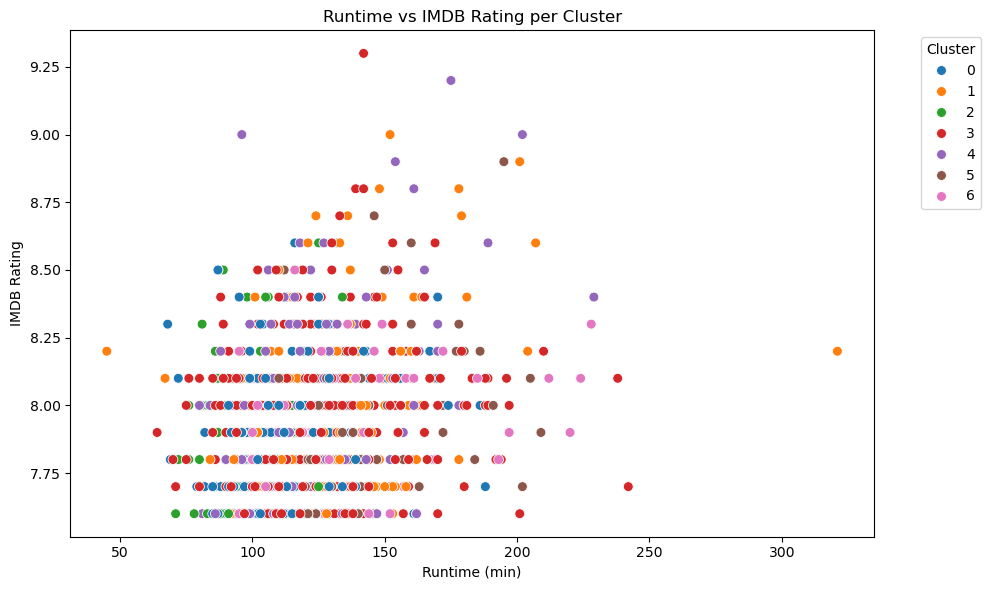

In [497]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Plot Runtime vs IMDB_Rating med klusterf칛rger ===
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Runtime',
    y='IMDB_Rating',
    hue='Cluster',  # F칛rga baserat p친 kluster
    palette='tab10',
    s=50
)
plt.title("Runtime vs IMDB Rating per Cluster")
plt.xlabel("Runtime (min)")
plt.ylabel("IMDB Rating")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

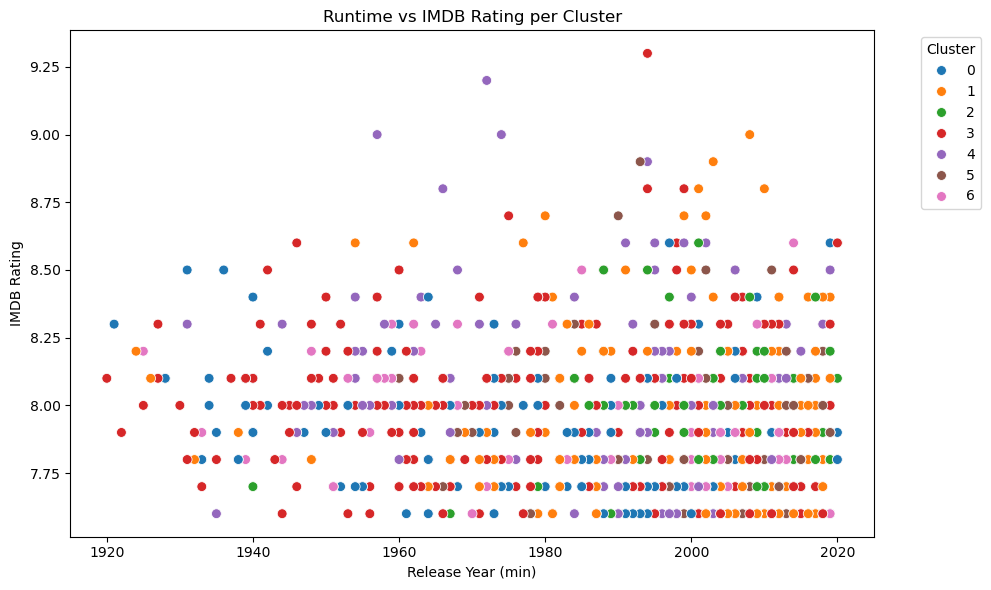

In [498]:
import seaborn as sns
import matplotlib.pyplot as plt

# === Plot Runtime vs IMDB_Rating med klusterf칛rger ===
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Released_Year',
    y='IMDB_Rating',
    hue='Cluster',  # F칛rga baserat p친 kluster
    palette='tab10',
    s=50
)
plt.title("Runtime vs IMDB Rating per Cluster")
plt.xlabel("Release Year (min)")
plt.ylabel("IMDB Rating")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

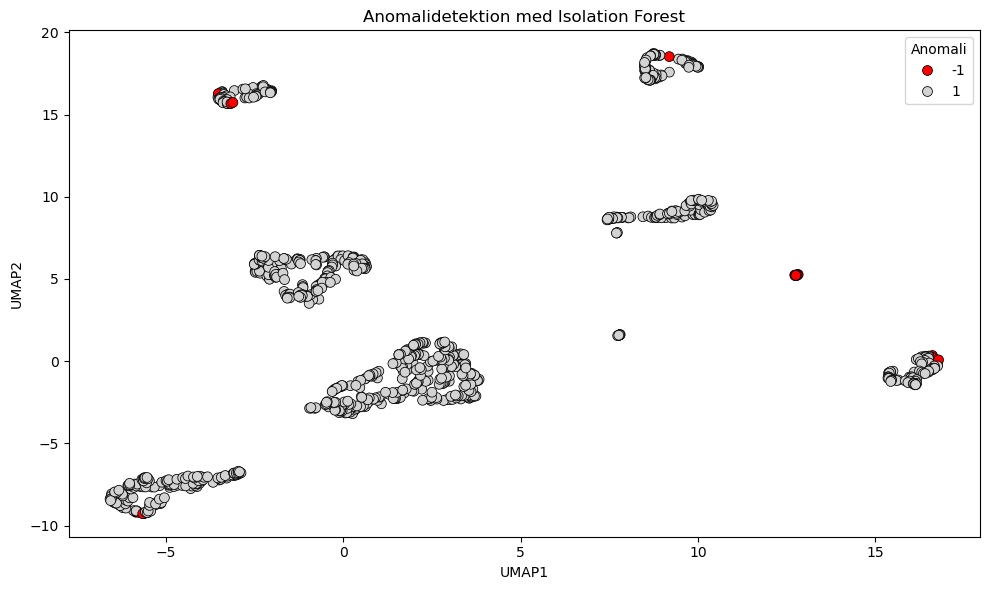

In [499]:
from sklearn.ensemble import IsolationForest

# === 1. Isolation Forest ===
iso = IsolationForest(contamination=0.03, random_state=42)
df['Anomali'] = iso.fit_predict(embedding)  # -1 = anomalier, 1 = normal

# === 2. Visualisering i UMAP-plot ===
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='UMAP1', y='UMAP2',
    hue='Anomali',
    palette={1: 'lightgrey', -1: 'red'},
    s=50,
    edgecolor='black'
)
plt.title("Anomalidetektion med Isolation Forest")
plt.legend(title="Anomali", loc='upper right')
plt.tight_layout()
plt.show()
